<a href="https://colab.research.google.com/github/anneallin/taller-1-melanie-y-ana/blob/main/Finanzas_Computacionales_Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNIVERSIDAD EXTERNADO DE COLOMBIA
#FINANZAS COMPUTACIONALES
#TALLER 1
#MELANIE CANDIL Y ANA ACOSTA





In [50]:
# Se importan las librerías
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import pylab as py

In [51]:
# Para descargar los datos del mercado
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. **Descargue las series de tiempo de precios (ajustados) mensuales para el 

*   Elemento de la lista
*   Elemento de la lista

periodo Ene-2010 a Dic-2021 de las siguientes 4 acciones: MCD, GE, IBM, T. Con esta información:**




In [81]:
# Precios históricos para los activos seleccionados
activos = ["MCD", "GE","IBM","T"]
precios = yf.download(activos,start="2010-01-01",end="2021-12-31",interval="1Mo").dropna()
precios = precios.loc[:,"Adj Close"]
precios

[*********************100%***********************]  4 of 4 completed


,GE,IBM,MCD,T
Date,,,,
2010-01-01,91.124512,76.034470,43.710953,7.295420
2010-02-01,91.011169,78.997818,44.705189,7.279536
2010-03-01,103.782219,80.031342,47.111691,7.581749
2010-04-01,107.545799,80.499405,49.844330,7.646297
2010-05-01,93.232948,78.165520,47.217613,7.283842
...,...,...,...,...
2021-08-01,105.016113,126.196465,232.276596,19.121510
2021-09-01,102.645004,126.366852,237.139893,18.835596
2021-10-01,104.559380,113.787468,241.506790,17.615223


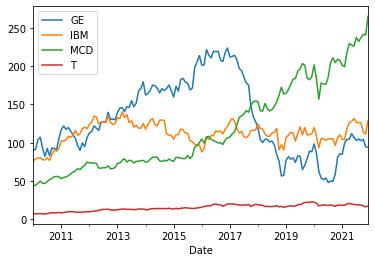

In [ ]:
precios.plot();

a.**Calcule los retornos logarítmicos**.


In [ ]:
retornos= np.log(precios/precios.shift()).dropna()
retornos

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001244,0.038233,0.022491,-0.002180
2010-03-01,0.131313,0.012998,0.052432,0.040677
2010-04-01,0.035622,0.005831,0.056384,0.008478
2010-05-01,-0.142815,-0.029421,-0.054138,-0.048563
2010-06-01,-0.125612,-0.009200,-0.006700,-0.004537
...,...,...,...,...
2021-08-01,0.017320,-0.004408,-0.021868,0.001370
2021-09-01,-0.022837,0.001349,0.020721,-0.015065
2021-10-01,0.018479,-0.104857,0.018247,-0.066985



GE
*   Se observó que durante el periodo analizado, el comportamientos de los retornos no fue optimo, puesto que presentó una tendencia negativa y cerró con rendimientos nada favorables. 

IBM, MCD y T
*   Tuvieron un comportamiento de los retornos muy volatil, no siguierón una tendencia marcada. Asi como generaron ganancias tambien obtuvieron perdidas. Son activos con retornos inciertos y muy poco seguros.






b. **Calcule las estadísticas descriptivas (media, mediana, desv. estándar, curtosis, simetría)
para cada uno de ellos. Presente los estadísticos en una tabla para todos los activos**.

In [ ]:
Estadistica = pd.DataFrame()

Media=retornos.mean()
Mediana=retornos.median()
Kurtosis= retornos.kurt()
Asimetria= retornos.skew()
Desviacion_Estandar=retornos.std()
Estadistica["Media"]= Media
Estadistica["Mediana"]= Mediana
Estadistica["Desviacion_Estandar"]= Desviacion_Estandar
Estadistica["Kurtosis"]= Kurtosis
Estadistica["Asimetria"]= Asimetria
print(Estadistica)

        Media   Mediana  Desviacion_Estandar  Kurtosis  Asimetria
GE   0.000231 -0.001929             0.086937  3.040752  -0.088295
IBM  0.003689  0.002619             0.060536  2.653592  -0.564635
MCD  0.012605  0.011742             0.042488  1.596986  -0.410192
T    0.006158  0.006484             0.048299  1.549806  -0.707907


GE


*   El 50% de los retornos toma valores iguales o inferiores a -0.001930
*   En promedio los retornos se acercan a 0.000231
*   Los retornos no son simetricos, ya que la media y la mediana no toman valores similares, siendo uno positivo y el otro negativo.
*   Se observa que la dispersión de los retornos en relación con el promedio de los propios rendimientos fue0.086.Esta accion es la que tiene mayor desviación de sus retornos, es decir, genera mayor incertidumbre respecto a su rendimiento.
*  Como los datos presentan una asimetria de -0.08, signiica que presentan una asimetria hacia la derecha.
*   La kurtosis es de tipo Leptocúrtica,es decir es una curva muy apuntada.



IBM

*   El 50% de los retornos toma valores iguales o inferiores a 0.002619 
*   En promedio los retornos se acercan a  0.003689
*   Los retornos no son simetricos, ya que la media y la mediana no toman valores similares, aunque los dos toman valores positivos.
*   Se observa que la dispersión de los retornos en relación con el promedio de los propios rendimientos fue 0.060.Presenta una desviacion menor de los retornos que GE.
*  Como los datos presentan una asimetria de -0.56, signiica que presentan una asimetria hacia la derecha.
*   La kurtosis nos indica que es una curva apuntada, aunque en menor proporcion que la del activo "GE".

MCD

*   El 50% de los retornos toma valores iguales o inferiores a 0.011
*   En promedio los retornos se acercan a 0.012  
*   Los retornos no son simetricos, ya que la media y la mediana no toman valores similares, aunque los dos toman valores positivos.
*   Se observa que la dispersión de los retornos en relación con el promedio de los propios rendimientos fue 0.042.Presenta una desviacion menor de los retornos que GE e IMB. Es decir, los retornos son un poco menos volatiles.
*  Como los datos presentan una asimetria de -0.410, signiica que presentan una asimetria hacia la derecha.
*   La kurtosis nos indica que es una curva un poco apuntada, aunque no tan apuntada como las del activo "GE" e "IBM", puesto que estas presentan mayor kurtosis.

T
*   El 50% de los retornos toma valores iguales o inferiores a 0.006
*   En promedio los retornos se acercan a 0.006
*   Los retornos son simetricos, ya que la media y la mediana toman valores similares.
*   Se observa que la dispersión de los retornos en relación con el promedio de los propios rendimientos fue  0.048.
*  Como los datos presentan una asimetria de -0.70, signiica que presentan una asimetria hacia la derecha.
*   La kurtosis nos indica que los datos están muy concentrados en la media.






c. **Presente en un Data Frame los retornos esperados y las volatilidades anualizadas**

In [ ]:
#  Retorno esperado y la volatilidad anualizada de GE
mean,sigma= retornos["GE"].mean(),retornos["GE"].std()
print(mean,sigma)
mean*12, sigma*np.sqrt(12)

0.00023139448046889248 0.08693660936373675


(0.0027767337656267096, 0.3011572489115205)



*   Se espera un retorno del 0.002, teniendo en cuenta que puede variar en  0.30 unidades, ya sea de manera positiva o negativa. 
*Se asume un riesgo alto por un rendimiento bajo.Es decir, el riesgo no justifica las posibles ganancias derivada de los retornos.




In [ ]:
#  Retorno esperado y la volatilidad anualizada de IBM
mean,sigma= retornos["IBM"].mean(),retornos["IBM"].std()
print(mean,sigma)
mean*12, sigma*np.sqrt(12)

0.003689235120406966 0.06053613337105465


(0.04427082144488359, 0.20970331738486492)

*   Se espera un retorno del 0.044, teniendo en cuenta que puede variar en  0.209 unidades, ya sea de manera positiva o negativa. 
*Este activo tiene una mejor relacion riesgo/retorno. Es decir, tiene un mayor nivel de retorno esperado a un  menor riesgo. Sin embargo el riesgo sigue siendo mayor al retorno.


In [ ]:
#  Retorno esperado y la volatilidad anualizada de MCD
mean,sigma= retornos["MCD"].mean(),retornos["MCD"].std()
print(mean,sigma)
mean*12, sigma*np.sqrt(12)

0.012605421367863268 0.04248817570059139


(0.15126505641435922, 0.1471833580686753)

*   Se espera un retorno del 0.15, asumiendo una variación en  0,14 unidades, ya sea de manera positiva o negativa. 
*La relacion riesgo/retorno es  muy similar. Es decir, aceptas un menor riesgo para obtener un mayor retorno, sn embargo, este retorno no es tan alto.

In [ ]:
#  Retorno esperado y la volatilidad anualizada de GE
mean,sigma= retornos["T"].mean(),retornos["T"].std()
print(mean,sigma)
mean*12, sigma*np.sqrt(12)

0.006157857759693697 0.04829863089718358


(0.07389429311632437, 0.1673113652998759)

*   Se espera un retorno del 1.55, asumiendo una variación en  0,76 unidades, ya sea de manera positiva o negativa. 
*La relación de este activo riesgo/retorno es positiva(2,28). Significa que debemos asumir un riesgo alto para obtener un rendimiento positivo, sin embargo, no es en una proporcion tan grande.

d. **Calcule la matriz de correlaciones de Pearson y de Sperman**

In [ ]:
#Matriz de correlación de Pearson
retornos_corr1= retornos.corr(method="pearson")
retornos_corr1

,GE,IBM,MCD,T
GE,1.000000,0.363578,0.151318,0.346995
IBM,0.363578,1.000000,0.322563,0.412459
MCD,0.151318,0.322563,1.000000,0.338351
T,0.346995,0.412459,0.338351,1.000000



1.  La relacion activo GE/IBM presenta una relacion positiva ¿, pero muy debil. No existe mayor asociación. 
2.   La relacion activo GE/MCD presenta una relacion casi nula.



In [ ]:
#Matriz de correlación de Sperman
retornos_corr= retornos.corr(method="spearman")
retornos_corr

,GE,IBM,MCD,T
GE,1.000000,0.343396,0.091615,0.312855
IBM,0.343396,1.000000,0.260223,0.358745
MCD,0.091615,0.260223,1.000000,0.299497
T,0.312855,0.358745,0.299497,1.000000


-Este método se utiliza cuando los datos no satisfacen la condición de normalidad, para aplicar la correlación de pearson.En   nuestro caso es más apropiado la correlacion de spearman, debido a que nuestros datos no siguen una distribución conocida.
-Esto explica el porque los datos de correlacion con respecto a la de pearson son inferiores.

  1. GE-IBM
*   Entre estos activos existe una relacion lineal positiva mediana. Es decir los retornos de ambos activos tienden a incrementarse, sin embargo, al ser de mediana asociación el efecto no es tan grande.

2. GE-MCD
*   Entre estos activos existe una relacion lineal minima. Cuando un activo sube , el optro tambien pero en una proporcion muy pequeña. 

3. GE-T
*   Entre estos activos existe una relacion lineal positiva mediana. 



e. **Grafique el histograma de frecuencia de los retornos para dos de las cuatro acciones**

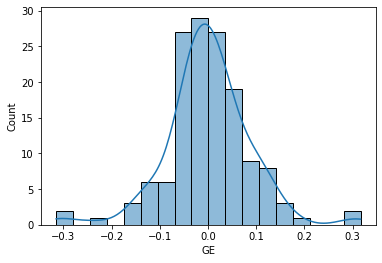

In [ ]:
#Histograma de freuencia para GE
retornos= np.log(precios/precios.shift()).dropna()
sbn.histplot(data=retornos, x="GE", kde=True, bins=18);



* En este histograma de retornos de la acción "GE", el pico de los datos ocurre cerca a un retorno de 0,0.
*   La dispersion de los datos es de casi -0,2 hasta 0,3.
*   El histograma presenta datos asimetricos hacia la izquierda. Esto nos indica los datos de tiempo de falla. Entre mas asimetricos a la izquierda son, significa que si un retorno da negativo más rapido ,en los siguientes periodos, los retornos serán negativos.
*   Se evidencia un dato atípico de 0,3. Es decir no fue comun obtenr este retorno. Alrededor de 3 veces se tuvo este retorno.
* los retornos que menos veces se consiguieron fue 0,2 y -0,2.
*La mayoria de retornos se movio en los rangos:(0,0-(-0,1)) y (0,0- 0,1).
*Se puede evidenciar una gran concentracion de datos respecto a la media. Es decir los retornos se acercaron a 0.0, sin embargo, hubo un par de datos que se alejaron considerablemente.



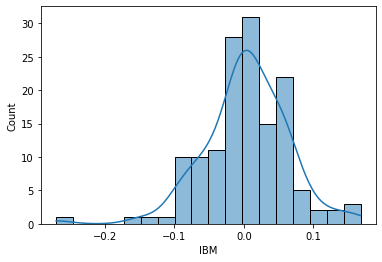

In [ ]:
#Histograma de frecuencia para IBM
retornos= np.log(precios/precios.shift()).dropna()
sbn.histplot(data=retornos, x="IBM", kde=True, bins=18);



* En este histograma de retornos de la acción "IBM", el pico de los datos ocurre cerca a un retorno de 0,0 con tendencia positiva.
*   La dispersion de los datos es de casi -0,2 hasta 0,3.
*   El histograma presenta datos asimetricos hacia la izquierda. Esto nos indica los datos de tiempo de falla. Entre mas asimetricos a la izquierda son, significa que si un retorno da negativo más rapido ,en los siguientes periodos, los retornos serán negativos.
*   Se evidencia un dato atípico de -0,1. Es decir no fue comun obtener este retorno. Alrededor de 2 veces se tuvo este retorno.
* El retorno que menos veces se consiguio fue enel rango -0,2 y -0,1.
*La mayoria de retornos se movio en el rango(0,0- 0,1).
*Hubo aproximadamente 20 retonos que tendieron a -0,1.


#  **Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos. Consolide los resultados en un Data Frame para todos**

In [120]:

sk=stats.kstest(retornos["MCD"],'norm'),stats.kstest(retornos["GE"],'norm'),stats.kstest(retornos["T"],'norm'),stats.kstest(retornos["IBM"],'norm')
sk

(KstestResult(statistic=0.45432973805127225, pvalue=1.7364332530678077e-27),
 KstestResult(statistic=0.4159825267456674, pvalue=6.374946614934755e-23),
 KstestResult(statistic=0.4606995274723966, pvalue=2.713392423024787e-28),
 KstestResult(statistic=0.43726569561758094, pvalue=2.1441549482767187e-25))

In [121]:
sk=pd.DataFrame({
    "Prueba de normalidad":["Kolmogorov-Smirnov"],
    "MCD":[stats.kstest(retornos["MCD"],'norm')],
    "GE":[stats.kstest(retornos["GE"],'norm')],
    "T":[stats.kstest(retornos["T"],'norm')],
    "IBM":[stats.kstest(retornos["IBM"],'norm')]
})
sk

,Prueba de normalidad,MCD,GE,T,IBM
0,Kolmogorov-Smirnov,"(0.45432973805127225, 1.7364332530678077e-27)","(0.4159825267456674, 6.374946614934755e-23)","(0.4606995274723966, 2.713392423024787e-28)","(0.43726569561758094, 2.1441549482767187e-25)"


Después de realizar las respectivas pruebas, se puede evidenciar que ninguno de los activos se distribuye normalmente, esto se debe a que todos los valores p son menores a la significanhcia (0,05).

2. 
a. Calcule la volatilidad mensual y anualizada de las series de retornos usando las medidas
de: i) desviación estándar, ii) Parkinson, iii) Garman-Klass y, iv) volatilidad ponderada
exponencial (EWMA) con una lambda de 0.94.

In [87]:
# Matríz de precios completa
activos = ["MCD", "GE","IBM","T"]
precios2 = yf.download(activos,start="2010-01-01",end="2021-12-31",interval="1Mo").dropna()

precios2

[*********************100%***********************]  4 of 4 completed


Adj Close                                          Close  \
                    GE         IBM         MCD          T          GE   
Date                                                                    
2010-01-01   91.124496   76.034492   43.710953   7.295423  123.692307   
2010-02-01   91.011162   78.997833   44.705173   7.279537  123.538460   
2010-03-01  103.782227   80.031349   47.111691   7.581748  140.000000   
2010-04-01  107.545731   80.499374   49.844318   7.646300  145.076920   
2010-05-01   93.232948   78.165504   47.217594   7.283844  125.769234   
...                ...         ...         ...        ...         ...   
2021-08-01  105.016113  126.196457  232.276596  19.121510  105.410004   
2021-09-01  102.645004  126.366852  237.139908  18.835596  103.029999   
2021-10-01  104.559380  113.787468  241.506790  17.615221  104.870003   
2021-11-01   94.708633  111.410393  240.572433  16.332380   94.989998   
2021-12-01   94.190170  128.862701  265.117676  17.598621   94.470001   

                                                     High              ...  \
                   IBM         MCD          T          GE         IBM  ...   
Date                                                                   ...   
2010-01-01  117.007645   62.430000  19.154079  130.153839  128.346085  ...   
2010-02-01  121.567879   63.849998  18.738670  131.000000  122.629066  ...   
2010-03-01  122.609940   66.720001  19.516617  145.692307  124.980881  ...   
2010-04-01  123.326958   70.589996  19.682779  151.538467  126.462715  ...   
2010-05-01  119.751434   66.870003  18.353474  148.769226  127.246651  ...   
...                ...         ...        ...         ...         ...  ...   
2021-08-01  134.168259  237.460007  20.709970  107.230003  138.336517  ...   
2021-09-01  132.820267  241.110001  20.400303  107.360001  134.388138  ...   
2021-10-01  119.598473  245.550003  19.078550  110.970001  139.579346  ...   
2021-11-01  117.099998  244.600006  17.243202  116.169998  124.779999  ...   
2021-12-01  133.660004  268.070007  18.580059   98.940002  134.990005  ...   

                   Low                   Open                          \
                   MCD          T          GE         IBM         MCD   
Date                                                                    
2010-01-01   61.060001  18.927492  117.076920  125.411087   62.630001   
2010-02-01   62.540001  18.587612  124.615387  117.810707   62.830002   
2010-03-01   63.250000  18.663141  123.846153  121.892921   63.980000   
2010-04-01   67.059998  19.244713  140.538467  123.279160   67.059998   
2010-05-01   65.550003  17.960726  145.923080  123.699806   70.879997   
...                ...        ...         ...         ...         ...   
2021-08-01  233.050003  20.302114  104.480003  135.229446  244.240005   
2021-09-01  235.949997  20.347431  105.360001  133.824097  237.880005   
2021-10-01  236.139999  18.889729  104.180000  134.799240  243.070007   
2021-11-01  243.949997  17.031721  105.760002  119.550667  245.800003   
2021-12-01  244.110001  16.631420   96.550003  118.250000  245.759995   

                            Volume                                          
                    T           GE          IBM          MCD             T  
Date                                                                        
2010-01-01  21.457705  208407550.0  163291687.0  158366700.0  9.665184e+08  
2010-02-01  19.388218  183090323.0  118418914.0  150643900.0  7.664459e+08  
2010-03-01  18.814199  270393890.0  146437175.0  153461200.0  7.816918e+08  
2010-04-01  19.675226  210661724.0  153162014.0  135971400.0  8.485327e+08  
2010-05-01  19.818731  267881367.0  197112633.0  185467000.0  9.881233e+08  
...               ...          ...          ...          ...           ...  
2021-08-01  21.329306  202482000.0   72891244.0   45210000.0  7.898068e+08  
2021-09-01  20.725077  211575700.0   80160627.0   55922700.0  9.844140e+08  
2021-10-01  20.498489  1371

Medida desviación estandar

In [88]:
#Volatilidad mensual Close-to-close: desvest
retornos = np.log(precios/precios.shift(1)).dropna()
sigma_d = retornos.std()
mean_d=retornos.mean()
mean_d
sigma_d*np.sqrt(12)

GE     0.301157
IBM    0.209703
MCD    0.147183
T      0.167311
dtype: float64

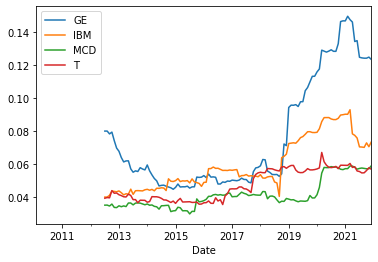

In [89]:
roll_std = (retornos.rolling(window=30).std())
roll_std.plot()

Medida de Prkinson

In [90]:
 
lnHL = np.log(precios2["High"]/precios2["Low"]).dropna()
sigmaPark_d = (((1/(4*np.log(2)))*lnHL**2)-(retornos.mean()**2)).mean()**0.5
sigmaPark_d

GE     0.093021
IBM    0.062220
MCD    0.049406
T      0.054067
dtype: float64

In [91]:

sigmaPark=sigmaPark_d*np.sqrt(12)
sigmaPark

GE     0.322234
IBM    0.215535
MCD    0.171148
T      0.187294
dtype: float64

Medida Garman- Klass

In [115]:
lnHL = np.log(precios2["High"]/precios2["Low"]).dropna()
lnCO = np.log(precios2["Close"]/precios2["Open"]).dropna()
sigmaGK_d = ((0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)-(retornos.mean()**2)).mean()**0.5
sigmaGK_d





GE     0.094820
IBM    0.063019
MCD    0.052101
T      0.055676
dtype: float64

In [106]:
# Volatilidad anual
sigmaGK=sigmaGK_d*np.sqrt(12)
sigmaGK

GE     0.328467
IBM    0.218304
MCD    0.180484
T      0.192866
dtype: float64

Medida EWMA

In [116]:
# En primer lugar definimos la función

def EWMAvol(retornos,Lambda):
  m = len(retornos) 
  b = np.arange(m-1,-1,-1) # secuencia decreciente
  l = np.repeat(0.94,m)

  varewma = ((np.power(retornos,2)*(np.power(l,b))).sum())*(1-Lambda)
  EWMAvol = np.sqrt(varewma)
  return(EWMAvol)

In [57]:
m = len(retornos) 
#Son 143 los retornos
m

143

In [58]:
#Se calcula la EWMA de cada accion
Lambda = 0.94
sigmaewma1 = EWMAvol(retornos["GE"],Lambda)*np.sqrt(12)
sigmaewma1

0.3650606863823513

In [59]:
Lambda = 0.94
sigmaewma2 = EWMAvol(retornos["IBM"],Lambda)*np.sqrt(12)
sigmaewma2

0.25637087543312825

In [61]:
Lambda = 0.94
sigmaewma3 = EWMAvol(retornos["MCD"],Lambda)*np.sqrt(12)
sigmaewma3

0.1818067564831486

In [62]:
Lambda = 0.94
sigmaewma4 = EWMAvol(retornos["T"],Lambda)*np.sqrt(12)
sigmaewma4

0.18827758650581483

**Volatilidades Dataframe**


In [117]:
ewmadf=pd.DataFrame({
    "Volatilidad":["EWMA","Close to Close STD","Parkinson","Garman-Klass"],
    "GE":[sigmaewma1,Estadistica.iloc[2,0],sigmaPark["GE"],sigmaGK["GE"]],
    "IBM":[sigmaewma2,Estadistica.iloc[2,1],sigmaPark["IBM"],sigmaGK["IBM"]],
    "MCD":[sigmaewma3,Estadistica.iloc[2,2],sigmaPark["MCD"],sigmaGK["MCD"]],
    "T":[sigmaewma4,Estadistica.iloc[2,3],sigmaPark["T"],sigmaGK["T"]],
})
ewmadf

,Volatilidad,GE,IBM,MCD,T
0,EWMA,0.365061,0.256371,0.181807,0.188278
1,Close to Close STD,0.012605,0.011742,0.042488,1.596986
2,Parkinson,0.322234,0.215535,0.171148,0.187294
3,Garman-Klass,0.328467,0.218304,0.180484,0.192866


b. Para un solo activo de su elección, presente las gráficas para las últimas tres medidas
de volatilidad.

PARKINSON

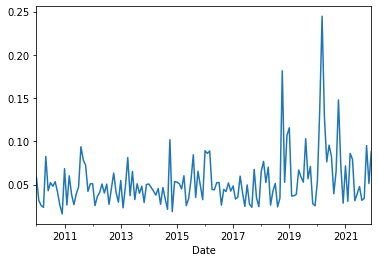

In [110]:
sigmaPark_dp = (((1/(4*np.log(2)))*lnHL**2)-(retornos.mean()**2))**0.5
sigmaPark_dp["IBM"].plot()

Garman-Klass

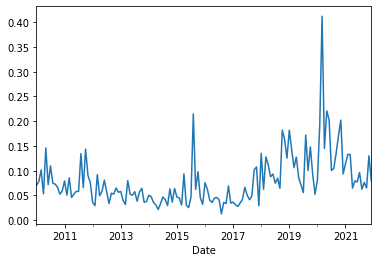

In [112]:
sigmaGK_dp = ((0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)-(retornos.mean()**2))**0.5
sigmaGK_dp["IBM"].plot()

EWMA

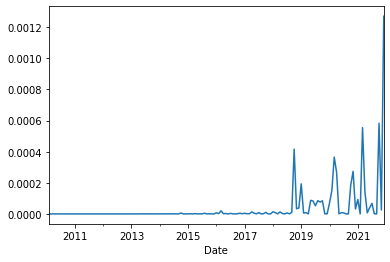

In [114]:

m = len(retornos) 
b = np.arange(m-1,-1,-1) # secuencia decreciente
l = np.repeat(0.94,m)

varewma = ((np.power(retornos["IBM"],2)*(np.power(l,b))))*(1-Lambda)
varewma.plot()
